In [ ]:
from google.colab import drive
drive.mount("drive", force_remount=True)

Mounted at drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Dataset_40000/clean_train.csv')
test = pd.read_csv('/content/drive/My Drive/Dataset_40000/clean_test.csv')

X_train = train['title']
X_test = test['title']
y_train = train['label']
y_test = test['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11111, random_state=368, stratify=y_train)

# **Naive Bayes**

In [ ]:
import pickle
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
start_time = time.time()
text_clf = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2))),
                     ('clf', MultinomialNB())
                    ])

text_clf = text_clf.fit(X_train, y_train)

train_time = time.time() - start_time
print('Done training Naive Bayes in', train_time, 'seconds.')

y_test_pred = text_clf.predict(X_test)

Done training Naive Bayes in 6.405377626419067 seconds.


Accuracy:  0.7821153846153847
F1-score:  0.781567665769991


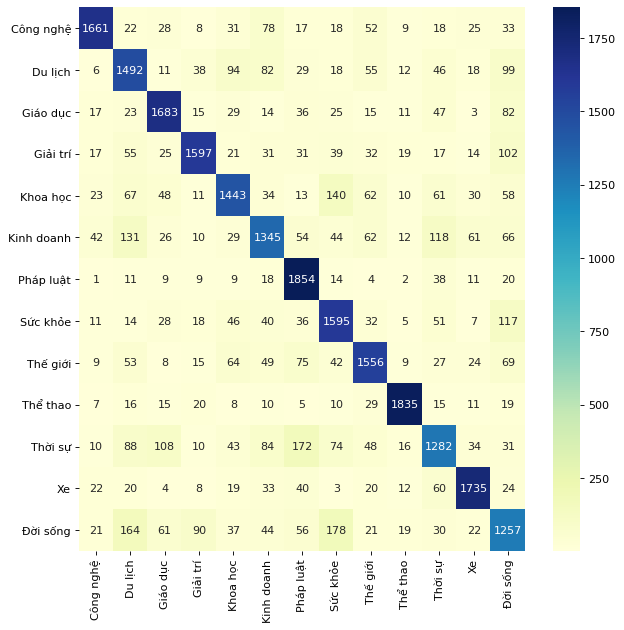

In [ ]:
acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average='macro')
confuse = confusion_matrix(y_test, y_test_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

print("Accuracy: ", acc)
print("F1-score: ", f1)

plt.figure(figsize=(9,9), dpi=80)
sns.heatmap(confuse, annot=True, fmt="d", xticklabels=['Công nghệ', 'Du lịch', 'Giáo dục', 'Giải trí', 'Khoa học', 'Kinh doanh', 'Pháp luật', 'Sức khỏe', 'Thế giới', 'Thể thao', 'Thời sự', 'Xe', 'Đời sống'], yticklabels=['Công nghệ', 'Du lịch', 'Giáo dục', 'Giải trí', 'Khoa học', 'Kinh doanh', 'Pháp luật', 'Sức khỏe', 'Thế giới', 'Thể thao', 'Thời sự', 'Xe', 'Đời sống'], cmap='YlGnBu')

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
    
start_time = time.time()
text_clf = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2))),
                     ('clf', LogisticRegression(solver='lbfgs', 
                                                multi_class='auto',
                                                max_iter=10000))
                    ])
text_clf = text_clf.fit(X_train, y_train)
 
train_time = time.time() - start_time
print('Done training Linear Classifier in', train_time, 'seconds.')

y_test_pred = text_clf.predict(X_test)

Done training Linear Classifier in 517.2986793518066 seconds.


Accuracy:  0.7867307692307692
F1-score:  0.7867378626921633


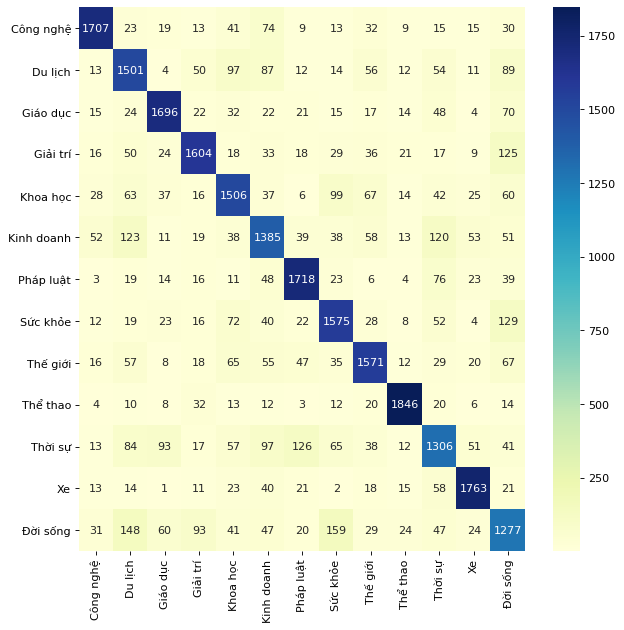

In [ ]:
acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average='macro')
confuse = confusion_matrix(y_test, y_test_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

print("Accuracy: ", acc)
print("F1-score: ", f1)

plt.figure(figsize=(9,9), dpi=80)
sns.heatmap(confuse, annot=True, fmt="d", xticklabels=['Công nghệ', 'Du lịch', 'Giáo dục', 'Giải trí', 'Khoa học', 'Kinh doanh', 'Pháp luật', 'Sức khỏe', 'Thế giới', 'Thể thao', 'Thời sự', 'Xe', 'Đời sống'], yticklabels=['Công nghệ', 'Du lịch', 'Giáo dục', 'Giải trí', 'Khoa học', 'Kinh doanh', 'Pháp luật', 'Sức khỏe', 'Thế giới', 'Thể thao', 'Thời sự', 'Xe', 'Đời sống'], cmap='YlGnBu')